# Студент Скрипин Антон
ФТ-360008

# Рабочие материалы для подготовки к практическому занятию "Перспективные средства предварительной обработки данных IoT"

### Цель
<li>Познакомиться с интегрированной средой разработки однородной вычислительной среды Минитера-2</li>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
import binascii

## Умножение матриц

В данной работе вам предстоит произвести отладку проекта ФОП умножения квадратных матриц 8х8 в базисе ОВС Минитера-2 с помощью интегрированной среды разработки.

Генерируем исходные матрицы.

In [22]:
a = np.zeros((8, 8))
b = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        a[i,j] = np.random.randint(0,4)
        b[i,j] = np.random.randint(0,4)

In [23]:
a.view()

array([[3., 2., 2., 0., 1., 3., 1., 3.],
       [2., 1., 2., 0., 0., 2., 0., 0.],
       [0., 2., 0., 2., 3., 3., 2., 3.],
       [1., 0., 3., 2., 1., 3., 0., 3.],
       [2., 1., 2., 3., 0., 0., 2., 3.],
       [2., 0., 3., 3., 0., 1., 3., 3.],
       [0., 1., 1., 0., 3., 2., 3., 3.],
       [0., 1., 2., 3., 1., 3., 2., 0.]])

In [24]:
b.view()

array([[1., 3., 3., 2., 0., 2., 1., 2.],
       [0., 3., 3., 1., 1., 1., 1., 2.],
       [1., 1., 1., 3., 0., 3., 1., 3.],
       [1., 2., 3., 2., 1., 2., 2., 2.],
       [0., 2., 1., 0., 3., 3., 3., 3.],
       [1., 3., 2., 3., 1., 1., 0., 1.],
       [1., 3., 1., 3., 0., 0., 3., 1.],
       [0., 2., 0., 2., 2., 0., 1., 2.]])

Матрица произведения

In [25]:
c = np.matmul(b, a)
c.view()

array([[15., 14., 25., 22., 17., 34., 20., 27.],
       [11., 13., 19., 20., 15., 27., 18., 21.],
       [14.,  9., 29., 26., 13., 31., 21., 27.],
       [15., 15., 26., 25., 20., 34., 25., 33.],
       [16., 13., 28., 29., 15., 25., 32., 30.],
       [16., 11., 24., 19., 11., 28., 12., 24.],
       [12., 11., 22., 11., 17., 30., 14., 24.],
       [10.,  7., 19., 16.,  7., 18., 11., 15.]])

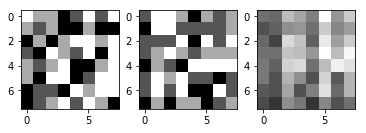

In [26]:
plt.subplot(131)
plt.imshow(a, cmap='gray', vmin=0)
plt.subplot(132)
plt.imshow(b, cmap='gray', vmin=0)
plt.subplot(133)
plt.imshow(c, cmap='gray', vmin=0)
plt.show()

Создаем файлы входных данных для IDE

In [27]:
N = 8
R = 5
sb = True
if sb:
    R += 1
for x in range(N):
    f = open("a{:d}".format(x), "wb")
    off = 2*x
    sh = off%8
    hs = ""
    for i in range(math.floor(off/8)):
        hs += "00"
    for i in range(math.ceil((N*R+sh)/8)):
        n = math.floor((i*8-sh)/R)
        w = 0
        for j in range(math.ceil(8/R)):
            if (n+j+1>N)|(n+j<0):
                t = 0
            else:
                t = int(a[n+j,x])
                if sb:
                    t = 1|(np.left_shift(t,1))
            t &= 2**R-1
            w |= np.left_shift(t,R*j)
        w = 255&np.right_shift(w,(i*8+R-sh)%R)
        hs += "{:02X}".format(w)
    f.write(binascii.a2b_hex(hs))
    f.close()

In [28]:
N = 8
R = 5
sb = True
if sb:
    R += 1
for x in range(N):
    f = open("b{:d}".format(x), "wb")
    off = 2*x
    sh = off%8
    hs = ""
    for i in range(math.floor(off/8)):
        hs += "00"
    for i in range(math.ceil((N*R+sh)/8)):
        n = math.floor((i*8-sh)/R)
        w = 0
        for j in range(math.ceil(8/R)):
            if (n+j+1>N)|(n+j<0):
                t = 0
            else:
                t = int(b[x,n+j])
                if sb:
                    t = 1|(np.left_shift(t,1))
            t &= 2**R-1
            w |= np.left_shift(t,R*j)
        w = 255&np.right_shift(w,(i*8+R-sh)%R)
        hs += "{:02X}".format(w)
    f.write(binascii.a2b_hex(hs))
    f.close()

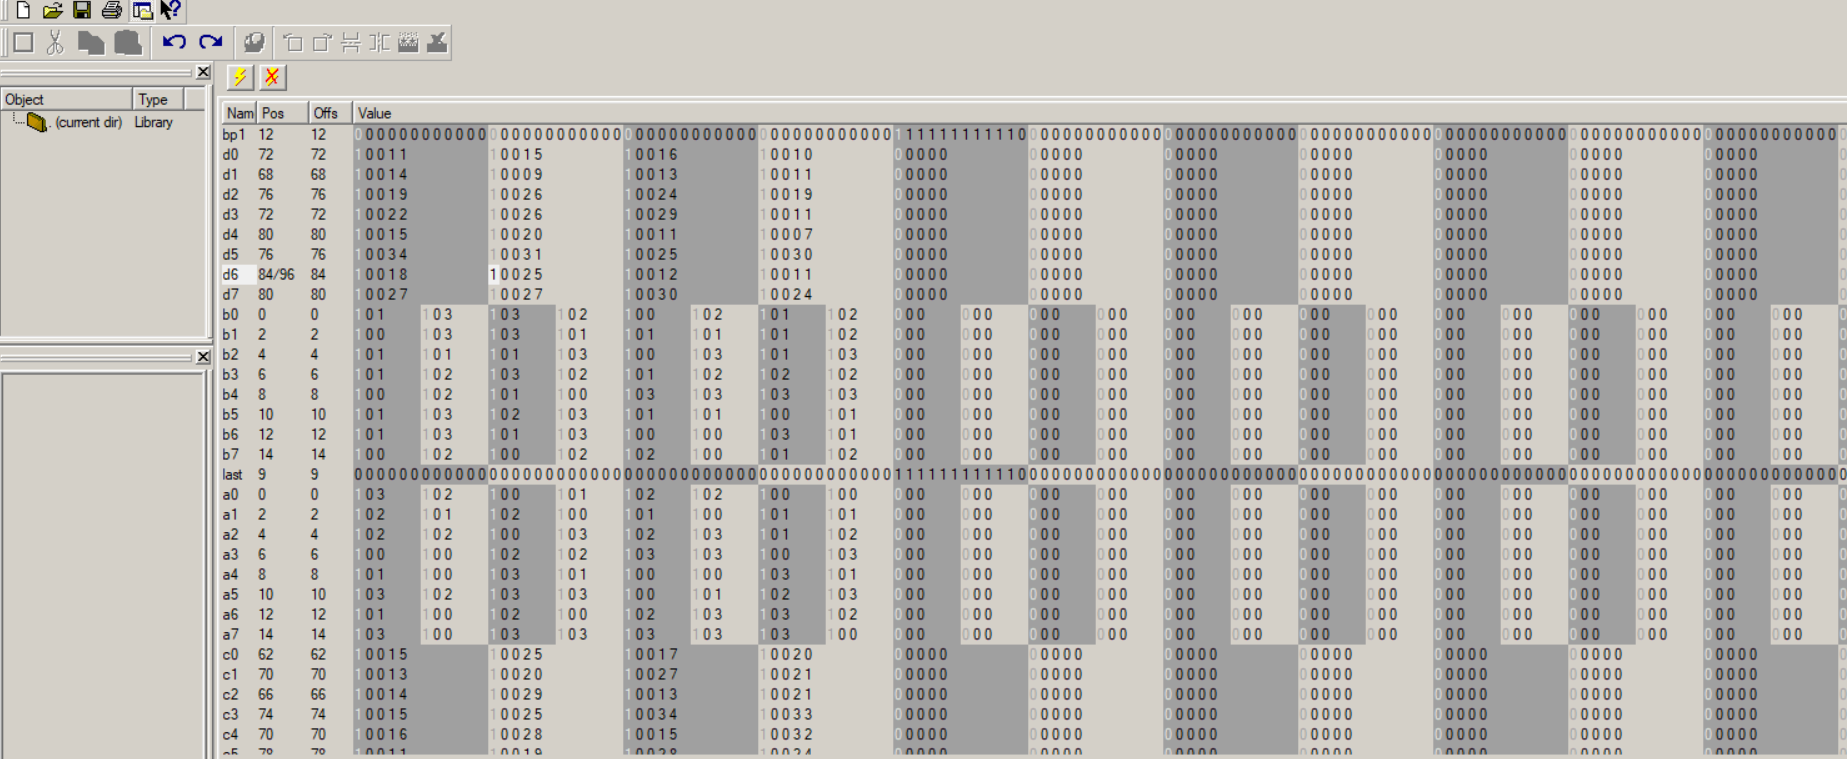

Наша матрица произведения:
array([[15., 14., 25., 22., 17., 34., 20., 27.],
       [11., 13., 19., 20., 15., 27., 18., 21.],
       [14.,  9., 29., 26., 13., 31., 21., 27.],
       [15., 15., 26., 25., 20., 34., 25., 33.],
       [16., 13., 28., 29., 15., 25., 32., 30.],
       [16., 11., 24., 19., 11., 28., 12., 24.],
       [12., 11., 22., 11., 17., 30., 14., 24.],
       [10.,  7., 19., 16.,  7., 18., 11., 15.]])
 Из которой следуют, что
 D0 11 15 16 10
 D1 14 9 13 11
 D2 19 26 24 19
 D3 22 26 29 11
 D4 15 20 11 07
 D5 34 31 25 30
 D6 18 25 12 11
 D7 27 27 30 24 имеем полное совпадение по столбцам с матрицей произведения представленоой в python тетрадке
 
 по строкам так же имеем совпадение
 
 Таким образом, программа работает корректно, произведение матриц подсчитано верно